In [1]:
import pandas as pd

def tratar_data(data):
  """
  Faz o tratamento da coluna de Datas para que o pandas reconheça os valores como
  referentes a um instante de tempo e não como uma string
  """
  return pd.Timestamp(data)

path = 'datasets/'
arquivo = path + 'previsoes_no_dataset_alvo.csv'

# abrimos o arquivo como um DataFrame, especificando a coluna que deve ser tratada e a função de tratamento
emocoes_pandemia = pd.read_csv(arquivo, parse_dates=[3], date_parser=tratar_data)
# ordenamos os dados por tempo
emocoes_pandemia = emocoes_pandemia.sort_values(by='Datas')
# mostra as 5 prmeiras linhas do DataFrame
emocoes_pandemia.head()

,Unnamed: 0,Textos,Sentimentos,Datas
31,31,"Tedros Adhanom Ghebreyesus, diretor da OMS, em...",medo,2020-04-01 22:25:07+00:00
20,20,Muitas dúvidas permanecem entre serviços que p...,raiva,2020-04-01 22:28:52+00:00
5,5,Jovem de 20 anos da etnia kokama recebe teste ...,medo,2020-04-01 22:29:15+00:00
8,8,Dois óbitos na Praia Grande por COVID-19. \n\n...,Neutro,2020-04-01 22:33:55+00:00
39,39,"Publiquei na ⁦\n@CNNBrasil\n ⁩ OAB pede, e STF...",nojo,2020-04-01 22:35:15+00:00


Vmoas montar um gráfico de linha, em que o eixo x corresponda ao tempo e o y ao número de tweets naquele momento. O parâmetro label corresponde ao sentimento em determinado momento.

Este exemplo do matplotlib pode nos ajudar a fazer linhas multicoloridas: https://matplotlib.org/stable/gallery/lines_bars_and_markers/multicolored_line.html#sphx-glr-gallery-lines-bars-and-markers-multicolored-line-py

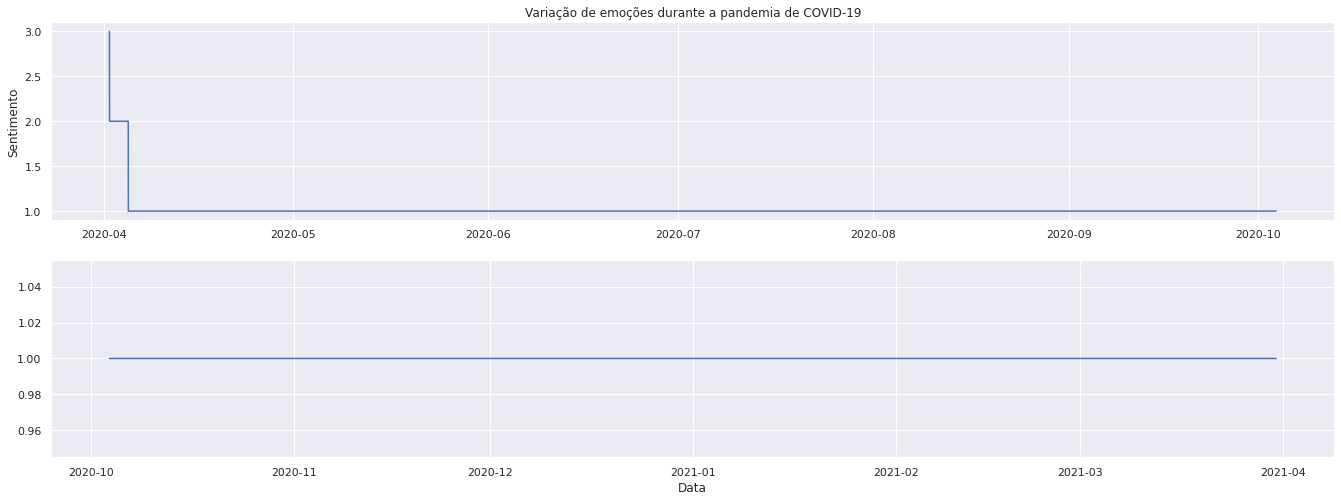

In [87]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt
import seaborn as sns
import numpy as np

sentimentos = emocoes_pandemia['Sentimentos'].to_list()
n_tweets = emocoes_pandemia.value_counts('Datas').to_list()
tempo = emocoes_pandemia.groupby('Datas')
tempo = list(tempo.indices)

sns.set()
fig, ax = plt.subplots(2, 1, figsize=(23,8))

ax[0].plot(tempo[:8423], n_tweets[:8423])
ax[0].set_ylabel('Sentimento')
ax[0].set_title('Variação de emoções durante a pandemia de COVID-19')

ax[1].plot(tempo[8423:16847], n_tweets[8423:16847])
ax[1].set_xlabel('Data')

fig.savefig('img/graph.png')